## Multiclass Classification

---

### **1. Introduction to Multiclass Classification**

In earlier projects, we focused on **binary classification** — where our model needed to decide between **two** classes (e.g., heart disease: _yes_ or _no_).

Now, we step into the world of **multiclass classification**, where the output can belong to **one of many possible categories**.

>**What’s the Difference?**

| **Task Type**               | **Output Classes**                  | **Example**                             |
|----------------------------|-------------------------------------|------------------------------------------|
| Binary Classification      | 2 (e.g., {0, 1})                    | Is this email spam or not?               |
| Multiclass Classification  | 3 or more (e.g., {A, B, C, ...})    | What kind of protein localization site?  |

>**Real-World Example: Yeast Protein Localization**

In this project, we will work with the **Yeast dataset**, where each input protein is described by features derived from its amino acid sequence. Our goal is to **predict the subcellular location** of the protein — such as:

- **MIT**: Mitochondrial  
- **NUC**: Nucleus  
- **CYT**: Cytoplasm  
- **ME3**: Membrane  
- _(and more...)_

This is a classic **multiclass classification** problem, because each instance belongs to **one of several** mutually exclusive classes.

>**How Do We Model This?**

In binary classification, we used a **sigmoid activation** to squash outputs into a [0, 1] range.

But in multiclass settings, we use:

- **Softmax activation** in the output layer  
- **Cross-entropy loss** adapted for multiple classes  

Let’s visualize the difference:

> **Binary Classification**    : Input → NN → Single Output Node → Sigmoid → Probability (0 to 1)
>
> **Multiclass Classification**: Input → NN → One Output Node per Class → Softmax → Class Probabilities

**Softmax** ensures that all output values are between 0 and 1, and they sum up to 1 — forming a valid probability distribution over the classes.

>**Why This Matters**

Multiclass classification is fundamental to many real applications:

- Image classification (cat vs. dog vs. horse vs. car)
- Document classification (news topic)
- Protein localization (as in this project)
- Diagnosis with multiple disease categories

As we go through this notebook, we’ll build up from this foundational idea and start modeling our yeast protein data using the appropriate tools.

➡️ In the next section, we’ll load and explore the dataset to understand the distribution of classes and the nature of features.

---

Now you are ready to answer **Multiple Choice Questions for this section (3.1.1.1-3.1.1.5)**

---

### **2. Dataset Overview**

Now that we understand the task, let’s take a closer look at the **Yeast dataset** we’ll be working with.

This dataset contains features extracted from amino acid sequences of proteins, and our goal is to predict their **subcellular localization site**.

>**Dataset: Yeast Dataset**

**Source**: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/110/yeast)

- **Samples**: 1,484  
- **Features (Inputs)**: 8 real-valued protein attributes (e.g., `mcg`, `gvh`, `alm`, etc.)  
- **Target (Output)**: `localization_site`

Finally, the column `localization_site` is our **target label** — it tells us the actual **destination** of each protein.  
Our goal is to build a model that **learns from the features** to correctly **predict** where a new, unseen protein will end up.

>**Understanding the Yeast Dataset: A Biological Analogy**

Imagine a bustling city where each **building (protein)** needs to be delivered to the correct **neighborhood (cell compartment)** — like the **nucleus**, **mitochondria**, or **cell membrane** — to do its job. The **Yeast dataset** captures the clues that help us figure out where each protein is supposed to go inside the cell.

Each row in the dataset represents a **protein**, and the columns are **features** derived from biological experiments or sequence analysis methods:

- **mcg**, **gvh**, **alm**, and **mit** are scores from scientific methods that try to predict where in the cell a protein might go based on its structure and sequence.

- **erl** is a yes/no (binary) flag indicating whether the protein has a special tag that keeps it in the **endoplasmic reticulum (ER)** — like a **postal stamp for ER delivery**.

- **pox** and **vac** are similar scores telling us how likely the protein is to be headed to **peroxisomes** or **vacuoles**, which are like **recycling centers and storage units** in the cell.

- **nuc** is a score indicating whether the protein might be destined for the **nucleus**, where the DNA lives.

We’ll start by loading the dataset and inspecting its structure.

> ℹ️ The dataset used here is a preprocessed version of the original UCI Yeast dataset  
> with normalized values and a clean target column name: `localization_site`.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("yeast.csv")

# Show the first few rows
print(df.head())

    mcg   gvh   alm   mit  erl  pox   vac   nuc localization_site
0  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22               MIT
1  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22               MIT
2  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22               MIT
3  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22               NUC
4  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22               MIT


**Shape and Structure**

Let’s check the number of samples and features:

In [2]:
# Check dataset shape
print(f"Shape of dataset: {df.shape}")

# Check column data types
print(df.dtypes)

Shape of dataset: (1484, 9)
mcg                  float64
gvh                  float64
alm                  float64
mit                  float64
erl                  float64
pox                  float64
vac                  float64
nuc                  float64
localization_site     object
dtype: object


>**Feature Descriptions**

Here’s what each column represents:

| Column | Description |
|--------|-------------|
| `mcg`  | McGeoch’s method for signal sequence recognition |
| `gvh`  | von Heijne’s method for signal sequence recognition |
| `alm`  | ALOM membrane spanning region score |
| `mit`  | Discriminant score for mitochondrial content |
| `erl`  | Presence of ER retention signal (binary) |
| `pox`  | Peroxisomal targeting signal |
| `vac`  | Vacuolar/extracellular content score |
| `nuc`  | Nuclear localization signal score |
| `localization_site` | **Target** – Subcellular localization class |


We now have a good idea of the structure and contents of our dataset.

➡️ In the next section, we’ll explore the **distribution of the target classes** and perform some visual inspection of the features.

---

Now you are ready to answer **Multiple Choice Question for this section (3.1.2.1)**

---

**✅ Code Task 3.1.2.1: Dataset Exploration Basics**

📘 Instruction:
Inspect the shape and column names of the Yeast dataset. Extract the number of rows and columns, and print the names of all feature columns.

>NB: In order to avoid variable/function conflicts we have used the CT_ prefix.

In [3]:
# Task 1 – Dataset Dimensions and Columns

CT_df_shape =df.shape  # Tuple of (rows, cols)
CT_feature_cols =df.columns[:-1].tolist()# List of column names (excluding target)

print(f"CT_Dataset shape: {CT_df_shape}")
print(f"CT_Feature columns: {CT_feature_cols}")


CT_Dataset shape: (1484, 9)
CT_Feature columns: ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']


---

### **3. Class Distribution**


Before we train any model, it’s critical to understand the **distribution of classes** in the target variable.

This helps us:
- Detect any **class imbalance** 🧯
- Decide whether we need to apply **stratification**, **resampling**, or **evaluation metrics** that handle imbalance

**Target Variable: `localization_site`**

Let’s check how many samples belong to each class.

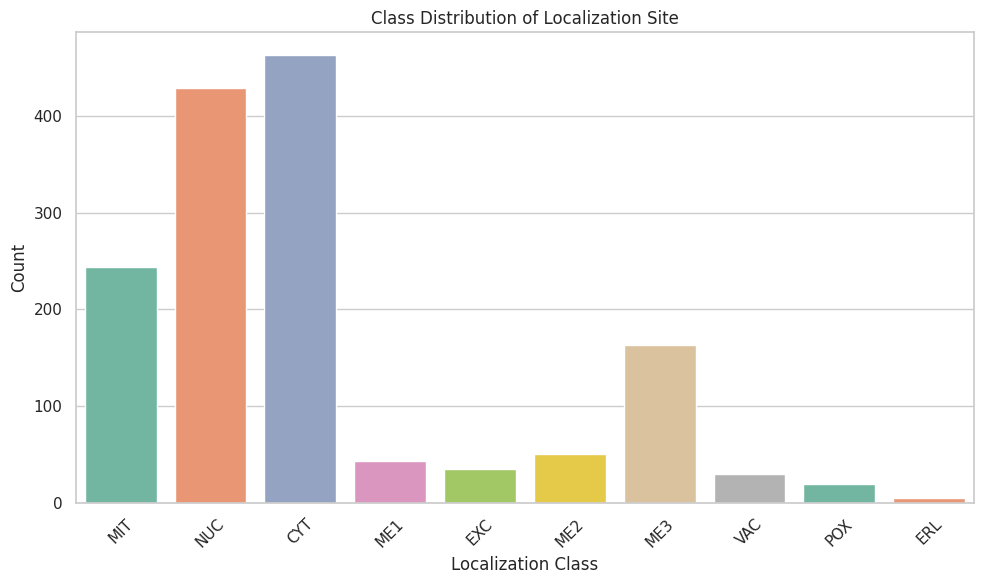

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_theme(style="whitegrid")
# Plot class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="localization_site", data=df, palette="Set2", hue="localization_site")
plt.title("Class Distribution of Localization Site")
plt.xlabel("Localization Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**What Did We Observe?**

- We clearly see that some classes (e.g., `MIT`, `NUC`, `CYT`) have **many more examples** than others (e.g., `POX`, `ERL`).
- This kind of **class imbalance** can lead to biased learning if not handled properly.
- We’ll revisit this when we evaluate our model performance — accuracy alone might be misleading.


➡️ Next, we’ll begin our **exploratory data analysis (EDA)** to investigate the feature distributions and patterns.

---

Now you are ready to answer **Multiple Choice Questions for this section (3.1.3.1-3.1.3.2)**

---

**✅ Code Task 3.1.3.1: Class Balance**

📘 Instruction:
Count the number of samples in each localization class. Store the result as a dictionary for inspection.

In [5]:
# Task 2 – Class Distribution Dictionary
CT_class_counts =df.iloc[:, -1].value_counts().to_dict() # dict with class label -> count
print("CT_Class distribution:", CT_class_counts)


CT_Class distribution: {'CYT': 463, 'NUC': 429, 'MIT': 244, 'ME3': 163, 'ME2': 51, 'ME1': 44, 'EXC': 35, 'VAC': 30, 'POX': 20, 'ERL': 5}


---

In [6]:
from IPython.display import VimeoVideo

VimeoVideo("1105511939", h="3298dbabb7", width=700, height=480)

### **4. Feature Distributions by Class**

Before we build any predictive model, we need to **understand how each feature behaves** — both overall and across different target classes.

In this section, we’ll:
- Explore the **distribution** of numerical features (e.g., `mcg`, `gvh`, `alm`, etc.)
- See how these vary by `localization_site` (our target)
- Use **violin plots** to combine boxplot and density views

>**Why Analyze Feature Distributions Before Modeling?**

Before we train a neural network to predict subcellular localization, we need to understand what kind of signals we’re giving it to learn from. Feature distribution analysis helps us answer key questions about our data and its suitability for classification:

🔍 **Class Separation Insight**: By examining how feature values differ across classes, we can spot whether a feature might be informative. For example, if a feature has clearly different ranges for different localization sites, it likely holds predictive power.

🚨 **Outliers and Skewness**: Unusual values or strongly skewed distributions might cause the model to focus on unimportant patterns or slow down training. Early detection lets us consider normalization or other preprocessing steps.

🧠 **Learning-friendly Inputs**: Neural networks learn better when inputs have well-behaved distributions — not too flat, not too peaky, and with distinct patterns across classes. Violin plots help us quickly assess this.

🛠️ **Feature Engineering Decisions**: If we see that a feature barely changes across classes, it may not contribute much to learning. Conversely, strong between-class separation can inspire us to emphasize that feature in future modeling.


In short, this step helps us build intuition about what the model might learn, before we even write a single line of PyTorch code.

>Let’s visualize the distributions!

We’ll use violin plots for the first 4 features (mcg, gvh, alm, mit) to start — these are intuitive and won’t overwhelm the chart.

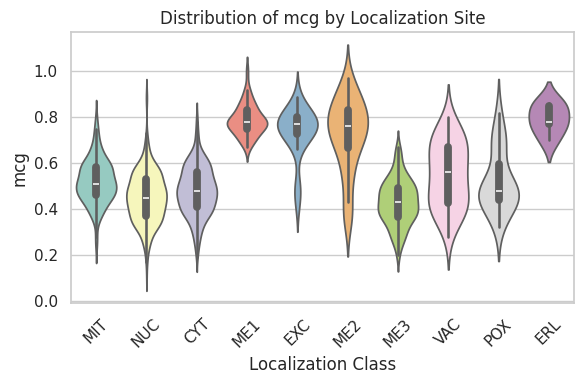

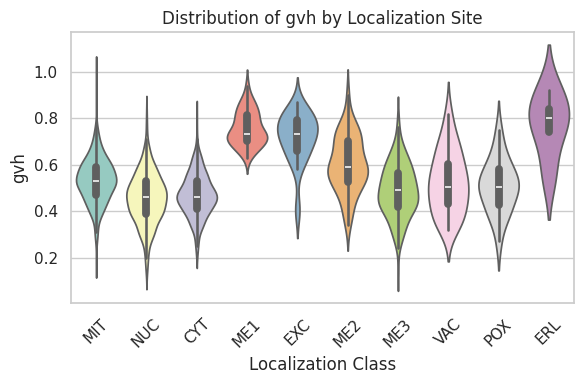

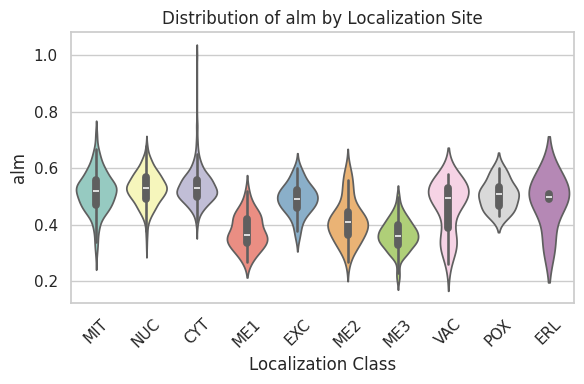

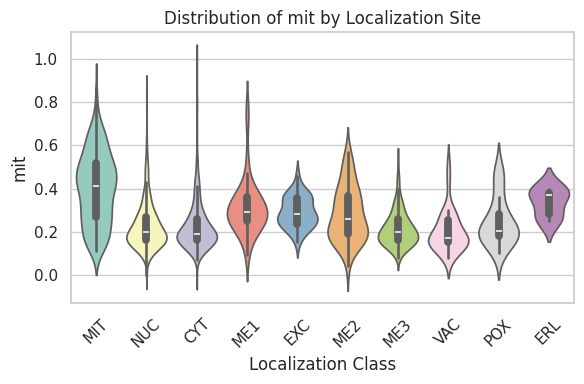

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a few features to plot
features_to_plot = ['mcg', 'gvh', 'alm', 'mit']

# Set style
sns.set_theme(style="whitegrid")
# Plot feature distributions by class using hue for future compatibility
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.violinplot(
        x="localization_site",
        y=feature,
        hue="localization_site",
        data=df,
        inner="box",
        palette="Set3",
        legend=False  # prevents duplicate legend
    )
    plt.title(f"Distribution of {feature} by Localization Site")
    plt.xlabel("Localization Class")
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


From the above violin plots, we can observe several interesting patterns:

- **mcg & gvh**: These two features show clear differentiation for some classes like `ME1`, `ME2`, and `ERL`, where their distributions are tightly packed and significantly shifted from others. This suggests they could be important discriminators for those classes.

- **alm**: This feature appears relatively stable across classes, but with subtle shifts. For example, `CYT`, `ME1`, and `VAC` show higher median values, suggesting some degree of separation potential.

- **mit**: The feature shows **notable variation** across classes. For instance, `MIT` and `ERL` tend to have higher values compared to `NUC`, `CYT`, or `VAC`. Since `mit` relates to mitochondrial proteins, its higher concentration in the `MIT` class is biologically consistent and useful for prediction.

- **General Observation**:
  - Classes like `ME1`, `ME2`, and `ERL` often have **more distinct feature profiles**, suggesting they may be easier to classify if the model learns the patterns correctly.
  - Other classes such as `CYT`, `NUC`, and `MIT` have overlapping distributions for many features, indicating possible **classification challenges** or a need for **feature interactions** to achieve good separation.

➡️ These patterns reinforce why we need **non-linear decision boundaries** and **deep learning models** — to capture subtle, multi-feature interactions that simpler classifiers might miss.

---

Now you are ready to answer **Multiple Choice Questions for this section (3.1.4.1-3.1.4.2)**

---

### **5. Feature Correlation Matrix**

Before diving into modeling, it’s essential to understand how features **relate to each other**.

A **correlation matrix** helps us visualize the strength and direction of linear relationships between pairs of continuous features.

>**Understanding Feature Correlations Before Modeling**

Understanding feature correlations helps us make sense of the information structure in our data — which is especially useful when we are about to feed this information into a neural network.

Here’s why it’s worth paying attention to:

🔁 **Redundancy and Multicollinearity**: If two features are highly correlated, they might be giving us the same signal. Including both doesn’t necessarily hurt a neural network, but it can lead to inefficient learning or slower convergence, especially in smaller networks.

🧠 **Neural Network Efficiency**: Deep learning models, especially simple ones like the MLPs we're starting with, work better when features are diverse and non-repetitive. Low correlation means each feature is adding new information, which can help the model learn richer patterns.

🧱 **Better Model Design**: If we spot strong correlations, we might consider:
- Combining features through dimensionality reduction (e.g., PCA in future projects).
- Removing redundant features to simplify the model.
- Normalizing inputs more carefully (important for gradient-based learning).

🧪 **Domain Insight**: In our case, understanding which biological signals (like mitochondrial vs. nuclear scores) are related can offer insight into how different cellular destinations overlap or differ — both biologically and statistically.

This is not just a data check — it’s a window into the inner structure of the learning problem.


>**Pearson Correlation Coefficient**

The most common measure of correlation is the **Pearson correlation coefficient**:

$$
r = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}
$$

- $r = +1$: perfect positive correlation  
- $r = -1$: perfect negative correlation  
- $r = 0$: no linear correlation

Let’s now **compute and visualize the correlation matrix** for our 8 features using a heatmap.

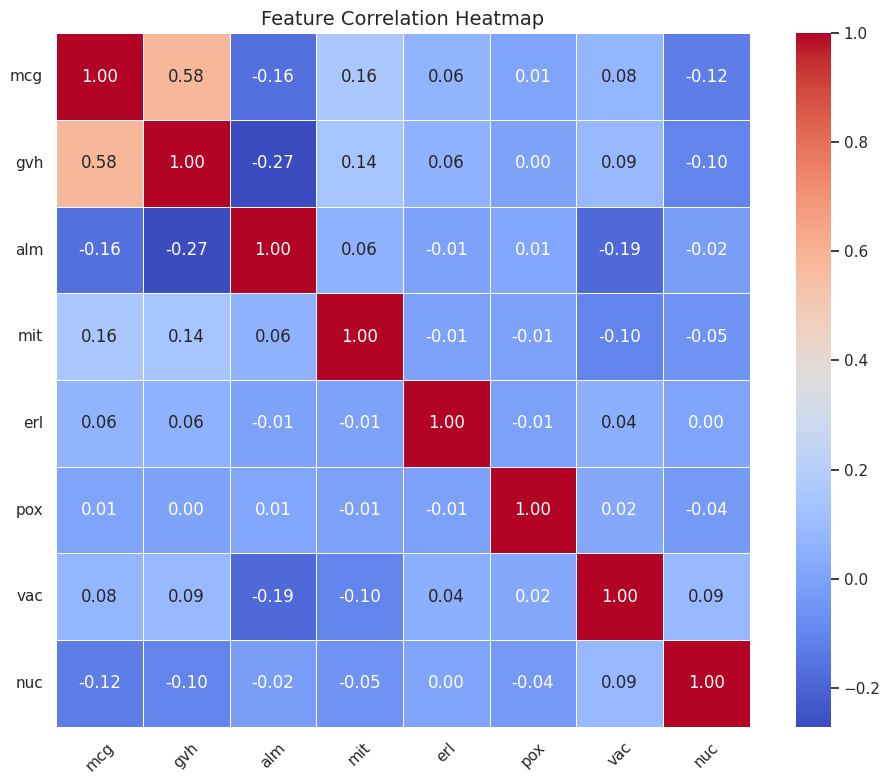

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for the 8 features
feature_cols = ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']
corr_matrix = df[feature_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


>**What Can We Observe?**

- Most feature correlations are **low to very low**, which is a good sign — we’re unlikely to face severe multicollinearity.
- The **highest observed correlation** is between `mcg` and `gvh` (~0.58), both of which relate to signal sequence recognition. This moderate correlation is expected due to their similar biological roles.
- Most other pairs, like `mit` and `alm`, or `pox` and others, are **nearly uncorrelated**.

We are working with a dataset where each feature contributes fairly independently, offering a diverse set of signals for a classifier to learn from.

This **low-redundancy environment** is particularly advantageous for training neural networks, which can leverage independent signals effectively.

➡️ In the next section, we’ll explore how to **prepare the target variable** — including converting categorical labels into numerical form and one-hot encodings. This is especially useful for understanding how multiclass classification is handled in PyTorch.

---

Now you are ready to answer **Multiple Choice Questions for this section (3.1.5.1-3.1.5.2)**

---

**✅ Code Task 3.1.5.1: Feature-Target Correlation Check**

📘 Instruction:
Compute the correlation between each feature and the label-encoded localization target. Use .corr() after converting the categorical target to numeric.

0       MIT
1       MIT
2       MIT
3       NUC
4       MIT
       ... 
1479    ME2
1480    NUC
1481    ME2
1482    NUC
1483    CYT
Name: localization_site, Length: 1484, dtype: object

In [12]:
CT_label_encoder = LabelEncoder()
CT_target_numeric = CT_label_encoder.fit_transform(df.iloc[:, -1])


CT_df_corr = df.iloc[:, :-1].copy()


CT_df_corr["label_numeric"] = CT_target_numeric


CT_feature_target_corr = CT_df_corr.corr()["label_numeric"].drop("label_numeric")

print("CT_Feature-target correlations:")
print(CT_feature_target_corr)


CT_Feature-target correlations:
mcg   -0.082527
gvh   -0.020542
alm   -0.102315
mit    0.109051
erl   -0.052257
pox    0.102067
vac    0.007111
nuc    0.178026
Name: label_numeric, dtype: float64


array([6, 6, 6, ..., 4, 7, 0], shape=(1484,))

---

### **6. Label Encoding & One-Hot Encoding**

Before we can train a model, we need to **convert the categorical target labels**  
(`localization_site`, like `"MIT"`, `"NUC"`, etc.) into **numeric formats** that machine learning models can process.

We'll apply two encodings for two purposes:

>**Label Encoding (For Model Training)**

- Converts each class to a unique integer (e.g., `"MIT"` → 0, `"NUC"` → 1, …).
- Used for training classifiers like neural networks in PyTorch.

>**One-Hot Encoding (For Understanding & Multiclass Output)**

- Converts each label into a vector with a `1` at the class index, `0` elsewhere.
- Used to understand the structure of multiclass targets and to compute class-wise losses.

>**Summary of Both Encodings**

| Class Label | Label Encoded | One-Hot Encoded       |
|-------------|----------------|------------------------|
| MIT         | 0              | [1, 0, 0, ..., 0]       |
| NUC         | 1              | [0, 1, 0, ..., 0]       |
| CYT         | 2              | [0, 0, 1, ..., 0]       |
| ...         | ...            | ...                    |


Let’s apply both encodings below.

In [15]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Copy the original dataframe to avoid modifying it in-place
df_encoded = df.copy()

# Label Encoding
label_encoder = LabelEncoder()
df_encoded['label_encoded'] = label_encoder.fit_transform(df_encoded['localization_site'])

# One-Hot Encoding (for illustrative purposes)
one_hot = pd.get_dummies(df_encoded['localization_site'], prefix="class")

# Display first few rows
print("✅ Label Encoded Classes:")
print(df_encoded[['localization_site', 'label_encoded']].head())

print("\n✅ One-Hot Encoded Output (first 5 rows):")
print(one_hot.head())


✅ Label Encoded Classes:
  localization_site  label_encoded
0               MIT              6
1               MIT              6
2               MIT              6
3               NUC              7
4               MIT              6

✅ One-Hot Encoded Output (first 5 rows):
   class_CYT  class_ERL  class_EXC  class_ME1  class_ME2  class_ME3  \
0      False      False      False      False      False      False   
1      False      False      False      False      False      False   
2      False      False      False      False      False      False   
3      False      False      False      False      False      False   
4      False      False      False      False      False      False   

   class_MIT  class_NUC  class_POX  class_VAC  
0       True      False      False      False  
1       True      False      False      False  
2       True      False      False      False  
3      False       True      False      False  
4       True      False      False      False  


**What Did We Just Do?**

- `label_encoded`: assigns a unique integer to each class — needed for model training.
- `class_*` columns: form the one-hot encoded representation — useful to visualize class structure.

**Why This Matters**

- Many models (like neural networks) **expect numeric targets**, not string labels.
- One-hot encoding helps us understand **how many classes there are** and provides a **structured format** for output layers.

📌 We'll use the **label-encoded column** as the training target in upcoming notebooks and preserve the original string labels for display and interpretation.

➡️ In the next section, we’ll take a deeper conceptual dive into **how softmax activation works** — the function at the heart of multiclass prediction — and understand how it transforms raw model outputs (logits) into meaningful probability distributions.

---

Now you are ready to answer **Multiple Choice Questions for this section (3.1.6.1-3.1.6.2)**

---

### **7. Softmax Function Explained**

In [16]:
from IPython.display import VimeoVideo

VimeoVideo("1105511885", h="3298dbabb7", width=700, height=450)

Now that we’re dealing with **multiclass classification**, we need a way to convert a model’s raw scores (logits) into **probabilities** that sum to 1.

That’s where **Softmax** comes in.

>**What is Softmax?**

Given logits $z_1$, $z_2$, ..., $z_K$ for $K$ classes,  
softmax produces a probability distribution:

$$
P(y = k \mid \mathbf{z}) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}
$$

- Exponentiation ensures **positivity**
- Division ensures probabilities **sum to 1**
- Higher logits → higher probability

>**Why Use Softmax?**

- We get **mutually exclusive probabilities** (i.e., pick one class)
- It's differentiable → compatible with gradient-based learning
- Helps us interpret model outputs as probabilities

>**Numerical Example: From Logits to Probabilities**

Let’s say our model outputs the following logits for a 3-class problem:  
`logits = [2.0, 1.0, 0.1]`

Let’s apply the **softmax** formula step by step:

> Step 1: Exponentiate the logits  
$$
e^{2.0} = 7.389,\quad e^{1.0} = 2.718,\quad e^{0.1} = 1.105
$$

>➕ Step 2: Sum the exponentiated values  
$$
\text{sum} = 7.389 + 2.718 + 1.105 = 11.212
$$

>🔗 Step 3: Divide each by the sum  
$$
P(\text{class 1}) = \frac{7.389}{11.212} \approx 0.659 \\
P(\text{class 2}) = \frac{2.718}{11.212} \approx 0.242 \\
P(\text{class 3}) = \frac{1.105}{11.212} \approx 0.099
$$

So, the model predicts **class 1** with the highest confidence, assigning it ~66% probability.

This example shows how **softmax** turns arbitrary logits into a **probability distribution**, and how changes in logits directly affect model predictions.


**Example: See Softmax in Action**

Let’s fix Class 2 and 3 logits, and vary Class 1’s logit.  
We’ll see how the softmax probabilities shift as Class 1 gets more "confident."



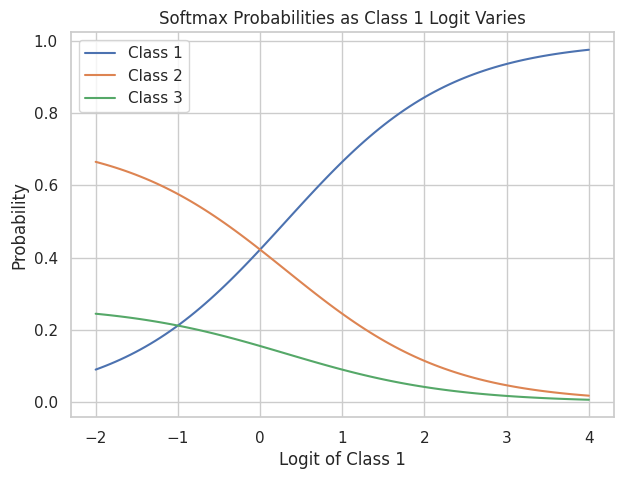

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(logits):
    exp_vals = np.exp(logits - np.max(logits, axis=1, keepdims=True))  # for numerical stability
    return exp_vals / np.sum(exp_vals, axis=1, keepdims=True)

# Vary logit of Class 1, fix Class 2 = 0, Class 3 = -1
z_vals = np.linspace(-2, 4, 100)
logits_list = [[z, 0, -1] for z in z_vals]
logits_array = np.array(logits_list)

probs = softmax(logits_array)

plt.figure(figsize=(7, 5))
plt.plot(z_vals, probs[:, 0], label="Class 1")
plt.plot(z_vals, probs[:, 1], label="Class 2")
plt.plot(z_vals, probs[:, 2], label="Class 3")
plt.xlabel("Logit of Class 1")
plt.ylabel("Probability")
plt.title("Softmax Probabilities as Class 1 Logit Varies")
plt.legend()
plt.grid(True)
plt.show()


**What to Observe in the Plot**

- Class 1’s probability increases steadily as its logit increases.

- Class 2’s probability drops sharply, even though its logit stays constant — because softmax redistributes probability across all classes.

- Class 3 also declines, but more gradually due to its lower starting logit.

➡️ This demonstrates that in softmax, a class’s probability is influenced not just by its own logit, but by how it compares to the other logits — showing the inherently competitive nature of the function.

In the next section, we’ll see how softmax outputs are evaluated using a **loss function** — specifically, **cross-entropy**.

---

Now you are ready to answer **Multiple Choice Questions for this section (3.1.7.1-3.1.7.2)**

---

**✅ Code Task 3.1.7.1: Softmax Validation**

📘 Instruction:
Implement a softmax function and apply it to a sample logit vector [2.0, 1.0, 0.1]. Print the resulting probabilities.

In [20]:
import numpy as np

# Task 4 – Simple Softmax Output
def CT_softmax(logits):
    exponent = np.exp(logits - np.max(logits, axis=1, keepdims=True))  
    soft = exponent / np.sum(exponent, axis=1, keepdims=True)          
    return soft

CT_sample_logits = np.array([[2.0, 1.0, 0.1]])
CT_probs = CT_softmax(CT_sample_logits)
print("CT_Softmax probabilities:", CT_probs)



CT_Softmax probabilities: [[0.65900114 0.24243297 0.09856589]]


---

### **8. Cross-Entropy Loss Explained**

Now that we’ve introduced **Softmax** for multiclass classification, we need a loss function that works well with it — that’s where **Cross-Entropy Loss** comes in.

>**❌ Why Not MSE?**

In regression tasks, we often use **Mean Squared Error (MSE)**:

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^N (\hat{y}^i - y^i)^2
$$

But for classification, **MSE doesn't perform well**:
- It doesn’t penalize wrong class probabilities effectively.
- It interacts poorly with softmax gradients during backpropagation.
- It treats class outputs as if they were continuous values, which they’re not.

✅ For classification, we need a loss function that compares **probability distributions** — and that’s what **cross-entropy** does.


>Intuition: Cross-Entropy Measures Surprise**

Cross-entropy quantifies how "surprised" our model is by the actual label.

- The **more confident and correct** the model is, the **lower** the loss.
- The **more confident and wrong** it is, the **higher** the loss.

>**General Formula for Cross-Entropy Loss**

When using **one-hot encoded labels**, the general formula is:

$$
\mathcal{L}_{\text{CE}} = -\sum_{k=1}^{K} y_k \log(\hat{p}_k)
$$

Where:
- $K$ = number of classes  
- $y_k \in \{0, 1\}$: 1 if class $k$ is the true class, 0 otherwise  
- $\hat{p}_k$: predicted probability for class $k$

🟡 Only one of the $y_k$ values is 1 (for the true class), so this simplifies to:

$$
\mathcal{L}_{\text{CE}} = -\log(\hat{p}_{\text{true class}})
$$

>**Numerical Example**

Let’s say the true class is class 2, and the model outputs the following softmax probabilities:

$$
[\hat{p}_1, \hat{p}_2, \hat{p}_3] = [0.1, 0.8, 0.1]
$$

Then:

$$
\mathcal{L} = -\log(0.8) \approx 0.22
$$

Now imagine the model is confident but wrong:

$$
[\hat{p}_1, \hat{p}_2, \hat{p}_3] = [0.7, 0.2, 0.1]
$$

Then:

$$
\mathcal{L} = -\log(0.2) \approx 1.61
$$

✅ This shows how cross-entropy **heavily penalizes confident mistakes**, which helps the model learn to be both accurate and calibrated.

>**Cross-Entropy vs. MSE**

Let’s now visualize how both loss functions behave when the model assigns varying probabilities to the correct class.


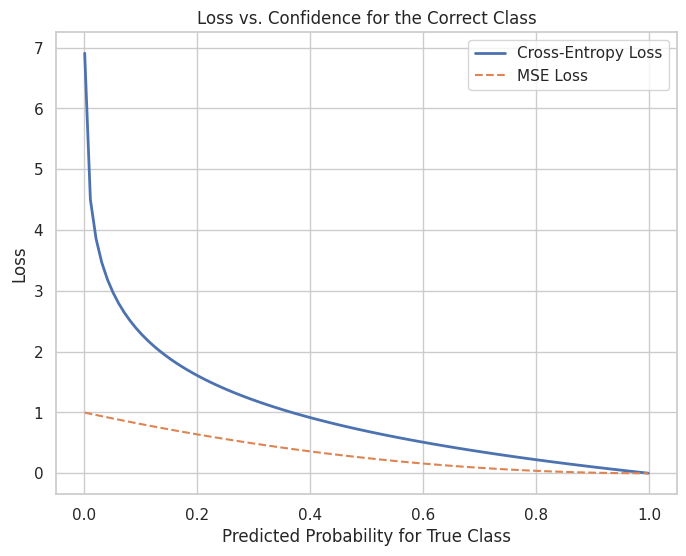

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Range of predicted probabilities for the correct class
p = np.linspace(0.001, 0.999, 100)

# Loss calculations
cross_entropy = -np.log(p)
mse = (1 - p)**2

# Plot
plt.figure(figsize=(8, 6))
plt.plot(p, cross_entropy, label='Cross-Entropy Loss', linewidth=2)
plt.plot(p, mse, label='MSE Loss', linestyle='--')
plt.xlabel("Predicted Probability for True Class")
plt.ylabel("Loss")
plt.title("Loss vs. Confidence for the Correct Class")
plt.legend()
plt.grid(True)
plt.show()


>**🔍 What This Plot Tells Us**

This plot compares Cross-Entropy Loss (solid blue) and Mean Squared Error (MSE) loss (dashed orange) as a function of the predicted probability assigned to the true class.

- 🟦 Cross-Entropy Loss drops sharply as the model becomes more confident (i.e., predicted probability approaches 1).
    But when the model assigns low probability to the correct class (i.e., it’s confidently wrong), the loss skyrockets — this acts as a strong penalty to push the model to improve.

- 🟧 MSE Loss also decreases as confidence increases, but much more slowly. It doesn’t punish incorrect predictions as strongly, which can lead to slower learning or models that don’t become as confident.

➡️ Key Insight:
Cross-entropy encourages the model to be confident and correct, and it penalizes confident mistakes more harshly, which leads to better gradient signals during training. That’s why it’s the standard choice for classification problems, especially when combined with softmax outputs.

>**📌 Summary:**

| Property           | MSE                            | Cross-Entropy                    |
|--------------------|--------------------------------|----------------------------------|
| Output Type        | Any real number                | Probabilities (0 to 1)           |
| Penalizes Confidence? | ❌ Not sharply                | ✅ Very sharply                   |
| Works with Softmax? | ❌ Not ideal                   | ✅ Perfect match                  |
| Loss Shape         | Symmetric curve                | Steep slope near 0, flat near 1  |

✅ That’s why **cross-entropy** is the go-to loss for multiclass classification.


➡️ In the next section, we’ll explore **metrics** like accuracy, precision, recall, and F1-score to evaluate how well our classifier performs.

---

Now you are ready to answer **Multiple Choice Question for this section (3.1.8.1)**

---

### **9. Evaluation Metrics for Multiclass Classification**

After training a classification model, we need to **evaluate how well it performs**.  
In multiclass classification, we go beyond just **accuracy** to get a deeper understanding of model behavior.

Let’s explore the most important metrics:

✅ **1. Accuracy**  : $ \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$

- Measures the overall proportion of correct predictions.
- ❗ Doesn’t tell us **which classes are being confused**.


📐 **2. Recall (a.k.a. Sensitivity / True Positive Rate)**: $\text{Recall}_c = \frac{\text{True Positives}_c}{\text{True Positives}_c + \text{False Negatives}_c}$

- Out of all **actual class** \( c \) samples, how many were correctly predicted?
- Measures the model’s ability to **catch** true instances of a class.


🎯 **3. Precision (a.k.a. Positive Predictive Value)**: $\text{Precision}_c = \frac{\text{True Positives}_c}{\text{True Positives}_c + \text{False Positives}_c}$

- Out of all samples **predicted as class** \( c \), how many were actually correct?
- Tells us how much we can **trust the model’s predictions** for a class.


🧪 **4. Specificity (a.k.a. True Negative Rate)**: $\text{Specificity}_c = \frac{\text{True Negatives}_c}{\text{True Negatives}_c + \text{False Positives}_c}$

- Out of all samples **not belonging to class** \( c \), how many were correctly rejected?
- Important when false alarms are costly.

⚖️ **5. F1 Score**: $\text{F1}_c = 2 \cdot \frac{\text{Precision}_c \cdot \text{Recall}_c}{\text{Precision}_c + \text{Recall}_c}$

- Balances both precision and recall.
- Useful when we care about **both completeness and correctness**.


📊 **6. Confusion Matrix**

The **confusion matrix** shows how predictions are distributed:

- **Rows**: Actual labels  
- **Columns**: Predicted labels  
- Diagonal = correct predictions  
- Off-diagonal = misclassifications


🧾 **7. Averaging Methods in Multiclass Metrics**

In multiclass settings, we summarize metrics across all classes using:

- **Macro average**: Treats all classes equally.  
- **Weighted average**: Weights each class by how frequent it is.  
- **Micro average**: Aggregates total TP, FP, FN globally (treats as binary).


> **📚 Binary Classification Example**

|                          | Predicted: Positive | Predicted: Negative |
|--------------------------|---------------------|---------------------|
| **Actual: Positive (1)** | 40 (TP)             | 10 (FN)             |
| **Actual: Negative (0)** | 30 (FP)             | 120 (TN)            |

**Now compute:**

- **Accuracy**: $\frac{TP + TN}{TP + TN + FP + FN} = \frac{40 + 120}{200} = 0.80$

- **Precision**: $\frac{TP}{TP + FP} = \frac{40}{40 + 30} \approx 0.571$

- **Recall (Sensitivity)**: $\frac{TP}{TP + FN} = \frac{40}{40 + 10} = 0.80$

- **Specificity**: $\frac{TN}{TN + FP} = \frac{120}{120 + 30} = 0.80$

- **F1 Score**: $2 \cdot \frac{0.571 \cdot 0.80}{0.571 + 0.80} \approx 0.666$

> 🔍 **Insight**: Accuracy looks good, but low precision indicates many **false positives**. F1 gives a more realistic picture of model performance.


> **📊 Multiclass Example**

Confusion matrix:

|              | Pred: A | Pred: B | Pred: C |
|--------------|---------|---------|---------|
| **Actual A** | 30      | 5       | 5       |
| **Actual B** | 10      | 25      | 5       |
| **Actual C** | 0       | 10      | 20      |

**Per-class Precision**:

- A: $\frac{30}{30 + 10} = 0.75$

- B: $\frac{25}{25 + 5 + 10} = 0.625$

- C:  $\frac{20}{20 + 10} = 0.666$

**Per-class Recall**:

- A: $\frac{30}{30 + 5 + 5} = 0.75$

- B: $\frac{25}{25 + 10 + 5} = 0.625$

- C: $\frac{20}{20 + 10} = 0.666$

**Macro Precision**: $\frac{0.75 + 0.625 + 0.666}{3} \approx 0.68$

**Macro Recall**: $\frac{0.75 + 0.625 + 0.666}{3} \approx 0.68$

> 🎯 **Insight**: Macro metrics treat all classes equally — useful when class balance is important. Weighted metrics may better reflect true performance when classes are imbalanced.

> **🧠 Terminology Bridge for Bio/ML Students**

| Clinical/Bio Name       | ML Equivalent              |
|-------------------------|----------------------------|
| **Sensitivity**         | **Recall**                 |
| **Specificity**         | **True Negative Rate**     |
| **Precision**           | **Positive Predictive Value (PPV)** |

Throughout this project, we’ll focus on **precision**, **recall**, **F1**, and confusion matrices because they generalize well to **multiclass problems** and are common in machine learning workflows.


Let’s now compute these metrics using some example actual classes against predictions:


Accuracy: 0.6
Macro Precision: 0.5
Macro Recall: 0.5666666666666667
Macro F1 Score: 0.5066666666666666

Detailed Classification Report:
              precision    recall  f1-score   support

         CYT       0.33      0.50      0.40         2
         ME3       0.50      1.00      0.67         1
         MIT       1.00      0.67      0.80         3
         NUC       0.67      0.67      0.67         3
         POX       0.00      0.00      0.00         1

    accuracy                           0.60        10
   macro avg       0.50      0.57      0.51        10
weighted avg       0.62      0.60      0.59        10



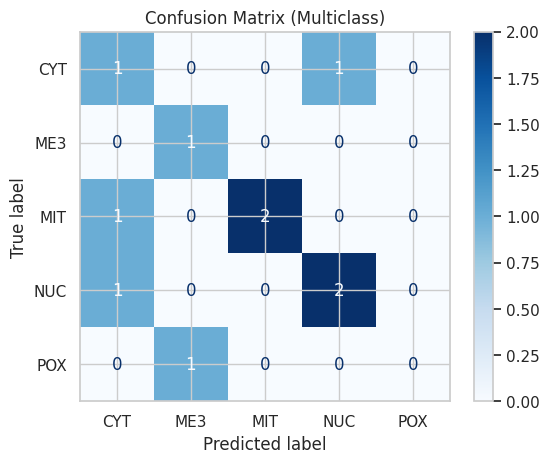

In [24]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)
import numpy as np
import matplotlib.pyplot as plt

# True and predicted labels from a multiclass model
y_true = np.array(['MIT', 'NUC', 'CYT', 'ME3', 'MIT', 'NUC', 'CYT', 'POX', 'MIT', 'NUC'])
y_pred = np.array(['MIT', 'NUC', 'NUC', 'ME3', 'CYT', 'NUC', 'CYT', 'ME3', 'MIT', 'CYT'])

# Accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# Macro-averaged precision, recall, F1 (with zero_division handled)
macro_precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
macro_recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
macro_f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

print("Macro Precision:", macro_precision)
print("Macro Recall:", macro_recall)
print("Macro F1 Score:", macro_f1)

# Full classification report (per-class metrics)
print("\nDetailed Classification Report:")
print(classification_report(y_true, y_pred, zero_division=0))

# Confusion Matrix
labels = np.unique(y_true)
cm = confusion_matrix(y_true, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Multiclass)")
plt.show()


---

Now you are ready to answer **Multiple Choice Question for this section (3.1.9.1)**

---

**✅ Code Task 3.1.9.1: Precision/Recall from Scratch**

📘 Instruction:
Manually compute precision and recall for class "MIT" from the y_true and y_pred arrays. (Use string matching without sklearn.)

In [26]:
import numpy as np

CT_class = "MIT"


CT_TP = np.sum((y_true == CT_class) & (y_pred == CT_class))


CT_FP = np.sum((y_true != CT_class) & (y_pred == CT_class))

CT_FN = np.sum((y_true == CT_class) & (y_pred != CT_class))


CT_precision = CT_TP / (CT_TP + CT_FP) if (CT_TP + CT_FP) > 0 else 0
CT_recall = CT_TP / (CT_TP + CT_FN) if (CT_TP + CT_FN) > 0 else 0

print(f"CT_Precision for {CT_class}: {CT_precision:.2f}")
print(f"CT_Recall for {CT_class}: {CT_recall:.2f}")


CT_Precision for MIT: 1.00
CT_Recall for MIT: 0.67


---

### **10. Mini-Demo – How Softmax Makes Predictions**

Let’s reinforce our understanding of the **softmax function** by running a simple demo.

We’ll:

1. Input some **made-up logits** (e.g., output from a neural net before softmax).
2. Apply the **softmax function** to convert logits into **class probabilities**.
3. Use **argmax** to select the predicted class (i.e., the one with highest probability).

>**Quick Recap: What Are Logits?**

Logits are the **raw outputs** of the last layer in a neural network — they can be **positive or negative**, and don't sum to 1.

Softmax converts them into **normalized probabilities**:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}}
$$


Let’s try it on 2 example instances:

- One that clearly favors a specific class
- One with more ambiguous logits

This helps us see how softmax behaves in different scenarios.

In [25]:
import numpy as np

# Define softmax
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))  # for numerical stability
    return exp_logits / np.sum(exp_logits, axis=-1, keepdims=True)

# Two example logits (as if from a neural net with 4 output classes)
logits_example_1 = np.array([2.0, 1.0, 0.1, -1.0])
logits_example_2 = np.array([0.5, 0.6, 0.4, 0.55])

# Apply softmax
probs_1 = softmax(logits_example_1)
probs_2 = softmax(logits_example_2)

# Predicted classes
pred_1 = np.argmax(probs_1)
pred_2 = np.argmax(probs_2)

print("Example 1 Logits:", logits_example_1)
print("Softmax Probabilities:", probs_1)
print("Predicted Class:", pred_1)

print("\nExample 2 Logits:", logits_example_2)
print("Softmax Probabilities:", probs_2)
print("Predicted Class:", pred_2)

Example 1 Logits: [ 2.   1.   0.1 -1. ]
Softmax Probabilities: [0.63806635 0.23473149 0.0954347  0.03176745]
Predicted Class: 0

Example 2 Logits: [0.5  0.6  0.4  0.55]
Softmax Probabilities: [0.24622782 0.27212383 0.22279615 0.2588522 ]
Predicted Class: 1


>🧩 What to Observe:

- In Example 1, the class with a large logit (e.g., 2.0) dominates the probabilities.
- In Example 2, the logits are close — softmax still produces probabilities, but none are extreme.

This helps us appreciate that softmax doesn’t just "pick the highest" — it converts relative distances into smooth probabilities.


---

### **11. Wrap-Up and Forward Pointer**

**What Have We Learned?**

In this notebook, we explored the **foundations of multiclass classification** using the *Yeast* dataset — a biologically inspired dataset for predicting protein localization sites.

Here’s what we covered:

✅ **Multiclass vs. Binary Classification**: We began by understanding how multiclass problems differ from binary ones — more than two possible classes means different output structure and evaluation strategies.

✅ **Yeast Dataset Exploration**: We inspected class distribution, feature ranges, and correlations, noting the biological patterns and potential modeling challenges (e.g., class imbalance).

✅ **Preprocessing**: We encoded labels for use with PyTorch models and visualized how the target variable behaves across features.

✅ **Softmax & Cross-Entropy**: We studied how a neural network transforms raw logits into probabilities and how cross-entropy loss guides learning by penalizing incorrect predictions.

✅ **Evaluation Metrics for Multiclass Tasks**: We reviewed not just accuracy, but also precision, recall, and F1-score — all crucial for judging model performance, especially with imbalanced classes.

✅ **Mini-Demo**: We used made-up logits to see how softmax predictions are made and which class is chosen — a concrete bridge between math and code.


>**What’s Next?**

In the next notebook (**NB02** of Project 3), we will:

- 🔧 **Build our first Multilayer Perceptron (MLP)** for multiclass classification using PyTorch.

- ⚙️ Define the model using `nn.Module`, train it with **gradient descent**, and evaluate it using the **cross-entropy loss** we just studied.

- 📊 We'll track loss and accuracy over epochs and begin to interpret how well our model performs.

**Final Thought**

This foundational understanding is **crucial** before we dive into model training.

Our goal isn’t just to get high accuracy — it’s to understand how neural networks **learn, make decisions**, and how we can **trust and improve** them.
